In [1]:
%pylab inline
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


# MOULIN'S WATER LEVEL TIMESCALE FLUCTUATIONS


    1.Reservoir-constriction equation from eq(5a)&(5b)
    2.Creep equation from eq(6) in Covington(2012)-> derived from Spring&Hutter(1981), 
    and also used in Arnold et al.(1998) model
    
![title](SketchMoulin.png)

    Constants:
    g = 9.81 m/s2
    
    Fixed variables:
    R 
    
    

In [5]:
# RESERVOIR-CONSTRICTION
########################

# Constant:
g = 9.81 #m/s2
rhow = 1000. # kg/m^3, density of water
rhoi = 900. # kg/m^3, density of ice
Lf = 3.34*10.**5 # J/kg
n = 3. # Unitless, ice flow law exponent
B = 5.8*10.**7 # N/m^2*s, Arrhenius parameter
f = 0.1 #unitless


# Inputs
R = 2. #m^3/s


# Parameters of the moulin
Z = 1000. # m, thickness of the ice
# r = 10. # m, radius of the moulin
# Ar = pi*r**2. # m^2
Ar = 100. # m2, surface area of the moulin

# Parameters of the conduit
# Ac = pi*(D**2)/4. 
L = 5000. #m


def dh_dt(parameter, time):
    Fh, FAc = parameter
    print Fh
    print FAc
    Pwet = 2*sqrt(FAc/pi)*pi
    #print Pwet
    D = FAc*4./Pwet #D is define with this relation FAc = pi*(D**2)/4.
    Cf = 1. + f*L/D
    #Pwet = 2.*pi*D/2 # conduit wetted perimeter can also be define as
    Q = FAc*sqrt(2.*g*Fh/Cf)
    #print Q
    Pw = rhow*g*Fh
    Pi = rhoi*g*Z    
    #Cf = 1. + f*L/D # Friction
    melt = (f*rhow*Pwet*Q**3.)/(8.*rhoi*Lf*FAc**3.)
    creep = 2.*(1./(n*B)**n)*FAc*(Pi-Pw)*abs(Pi-Pw)**(n-1.)
    dh2_dt = (R-Q)/Ar
    print dh2_dt
    return dh2_dt, melt-creep

# hours = 4 ;  duration = hours*3600
# tstep = duration/100

# t = linspace(0,duration,tstep)
initialpara=[124.,3.14] # initial h, initial conduit diameter
t = linspace(0,1000000,100)
result = odeint(dh_dt, initialpara, t)
#print t

124.0
3.14
-0.0777458425731
123.984930892
3.13989959432
-0.0777359995307
123.984932799
3.1398995913
-0.0777360001654
123.969865599
3.1397991826
-0.0777261579022
123.969867506
3.13979917959
-0.0777261585369
123.40207474
3.13600355738
-0.0773549093175
123.402072693
3.13600357191
-0.0773549090729
122.836996376
3.1322036884
-0.0769847736135
122.836992297
3.13220371729
-0.0769847731205
122.274622245
3.1283996445
-0.0766157525056
122.274618162
3.12839967333
-0.0766157520043
119.026906917
3.10598247109
-0.0744716312229
119.026846937
3.10598287273
-0.0744716226785
120.249115953
3.1145098656
-0.0752811509234
120.249093127
3.11451002278
-0.075281147886
121.866662654
3.12562603813
-0.0763476448381
121.86666175
3.12562604449
-0.0763476447252
121.46013277
3.12285025308
-0.0760801300363
121.460133672
3.12285024669
-0.0760801301475
121.055030948
3.12007230083
-0.0758132087621
121.055030947
3.12007230082
-0.0758132087611
120.651350411
3.11729222896
-0.0755468810216
120.65135041
3.11729222895
-0.075546

314.356500975
1.135601005
-0.0236831422419
302.21605698
1.09510171105
-0.0209314048794
302.216057214
1.09510157252
-0.0209313984258
291.544026703
1.05325541521
-0.0182920733205
291.544045537
1.05325535103
-0.0182920716424
282.274614088
1.0105924346
-0.0157812834344
282.274618984
1.0105923721
-0.0157812809798
274.334624606
0.967605806644
-0.0134098027722
274.334633115
0.967605797557
-0.0134098028983
267.646400433
0.924740564396
-0.0111836452467
267.646402605
0.924740574824
-0.0111836458126
262.130108477
0.882386297804
-0.00910476418218
262.130109394
0.882386337495
-0.00910476586889
257.70580105
0.840874116287
-0.00717183384694
257.705798715
0.840874156115
-0.00717183533195
254.294964389
0.800476429719
-0.00538099206341
254.294961564
0.8004764737
-0.00538099366486
251.821725806
0.761409476352
-0.00372653308687
251.82172221
0.761409509528
-0.00372653420922
250.213680559
0.723837380445
-0.00220149840819
250.213677407
0.723837405915
-0.00220149924449
249.350647947
0.683174104306
-0.00061848

0.000433947617722
559.20416461
0.474209821199
0.000433947791736
560.12756478
0.475231133075
0.000365084144235
560.127544361
0.475231139242
0.00036508418373
560.885133536
0.476416565764
0.000290546685429
560.885111983
0.476416572978
0.000290546691157
561.465729553
0.477737095661
0.000212022349372
561.465707169
0.477737104042
0.000212022310015
561.876572368
0.479232795422
0.000127309228294
561.876544862
0.479232806734
0.000127309128565
562.081460605
0.480805851382
4.21246944411e-05
562.081426843
0.480805866067
4.21245321049e-05
562.081654542
0.482418228538
-4.15482185711e-05
562.081620744
0.482418242896
-4.15483614097e-05
561.883155897
0.484031756636
-0.000121793337528
561.883120577
0.484031770438
-0.000121793422058
561.496468744
0.485608928901
-0.000196803847915
561.496433028
0.485608939932
-0.000196803778925
560.936298038
0.487113700787
-0.000264923976391
560.936262477
0.487113707301
-0.000264923672706
559.884802663
0.489052849871
-0.000346685810262
559.884698515
0.489052849204
-0.0003

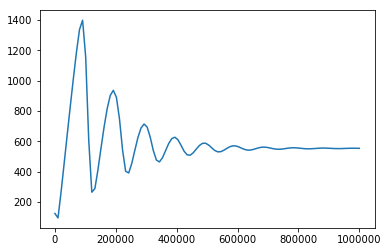

In [6]:
plot(t, result[:,0])

In [19]:
print FAc

NameError: name 'FAc' is not defined